# Inlämningsuppgift for statistics methods

Authors: Yuna Liu and Kun Han

Date: 2022/1/21

## Uppgifter 1

Här är tanken att du lära dig förstå hur Centrala gränsvärdessatsen fungerar genom att se hur ett histogram av observationer av stickprovsmedelvärden påverkas av hur många observationer som ingår i varje medelvärde. Dessutom behandlas konfidensintervall och styrka hos ett hypotestest.

I Python kan man, t ex med numpy.random.random_integers, generera observationer av en likformigt fördelad diskret slumpvariabel som tar värden 4,5,6,7. För en sådan slumpvariabel, kalla den X, gäller alltså att P(X=4)=P(X=5)=P(X=6)=P(X=7)=1/4. I deluppgifterna 1-7 menas slumpvariabel/slumpvariabler definierade enligt ovan även om det bara står slumpvariabel/slumpvariabler.

1) Vi ska alltså skapa observationer av stickprovsmedelvärden $${\bar x}$$ 
Hur ska du göra/skriva i Python för att få observationer av stickprovsmedelvärden baserade på fem observationer av slumpvariabler? Svara gärna med hjälp av en skärmdump och förklarande text.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as scs

In [7]:
# Create a uniformly distributed discrete random variable X of five observations
# which take values 4, 5, 6, 7
# we then calculate the mean X_bar for these five observations and save as x_bar_5

sample_5=np.random.randint(4,8,5)
x_bar_5=sample_5.mean()
sample_5, x_bar_5

(array([6, 7, 6, 4, 7]), 6.0)

**TODO**: random.randint, ja. den ger diskreta likformiga slumptal. random.uniform ger kontinuerliga likformiga och den ska ni använda i deluppgift 2

2) Skapa 1000 standardiserade stickprovsmedelvärden, vart och ett baserat på 2 observationer av slumpvariabler, och gör histogram för de 1000 standardiserade stickprovsmedelvärdena. Upprepa proceduren för stickprovsstorlekarna 10, 20, 30 och 50. 

3) Hur beräknar du μ_X ̅  i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)


**TODO**: write formelm here and correct the notation in question 3 and 4

4) Hur beräknar du σ_X ̅  i 2)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

In [8]:
# question 3)
# We first calculate the population mean my
my = 4*(1/4) + 5*(1/4) + 6*(1/4) + 7*(1/4)

# question 4)
# We then calculate the population standard deviation sigma to solve question 4)
sigma = np.sqrt((1/4)*(4-my)**2 + (1/4)*(5-my)**2 + (1/4)*(6-my)**2 + (1/4)*(7-my)**2).round(2)
my, sigma

(5.5, 1.12)

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


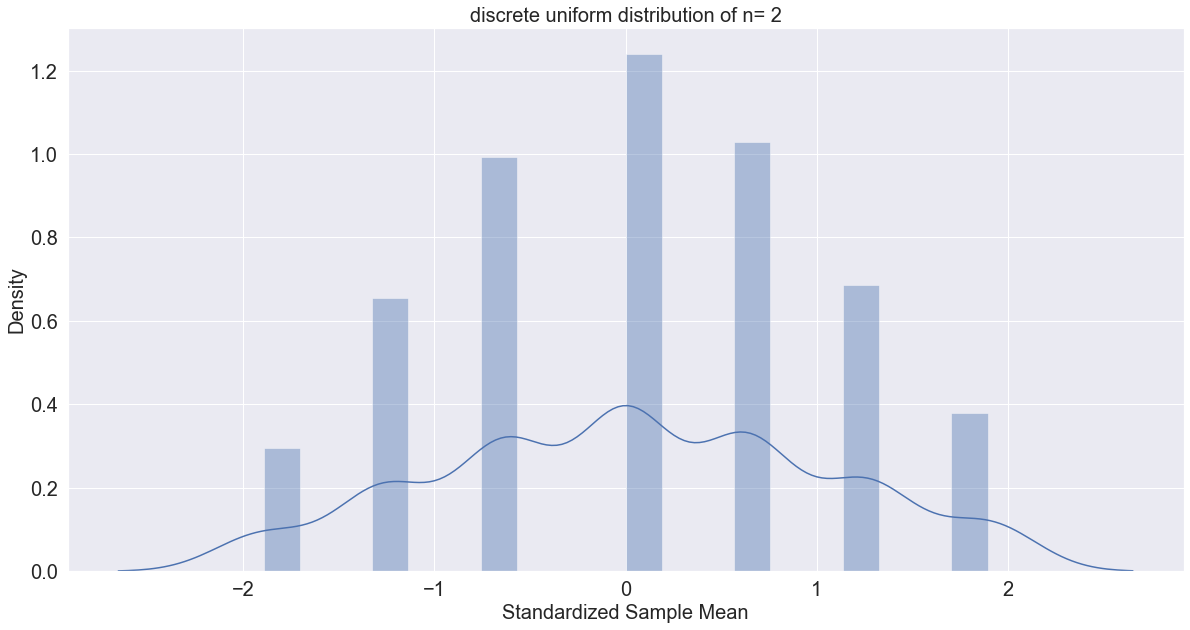

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


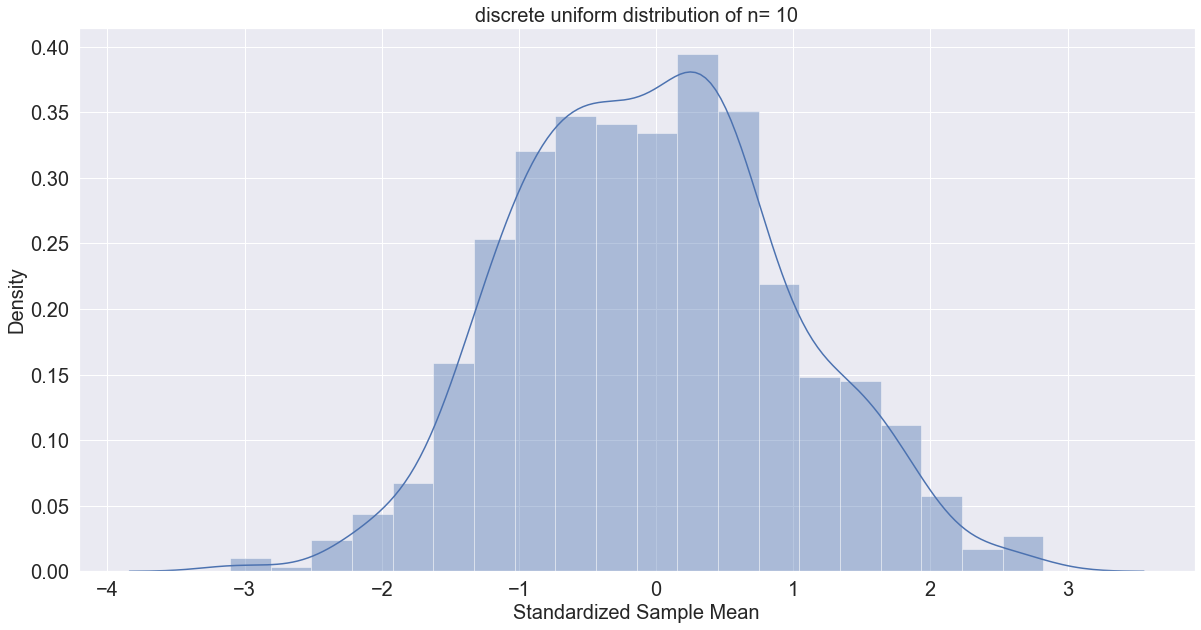

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


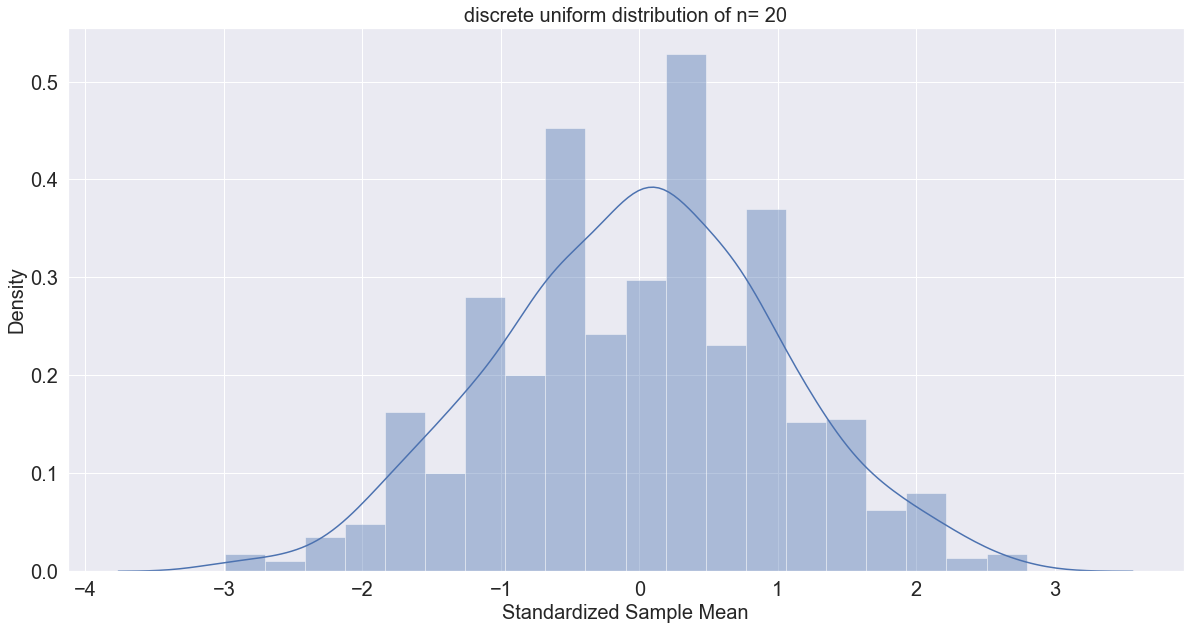

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


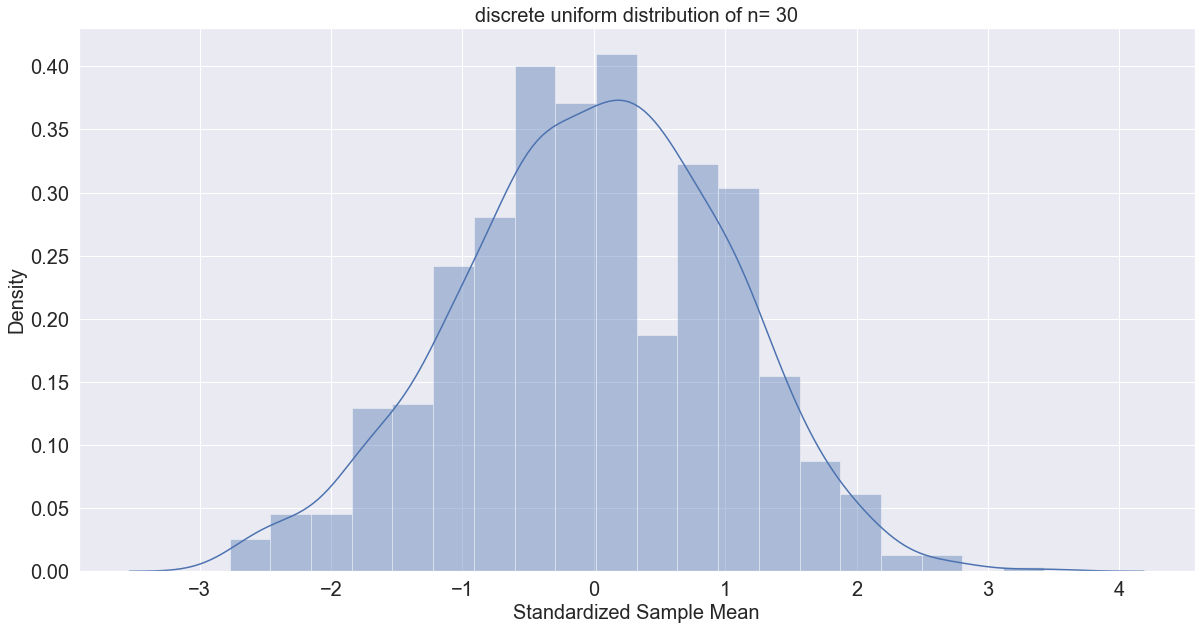

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


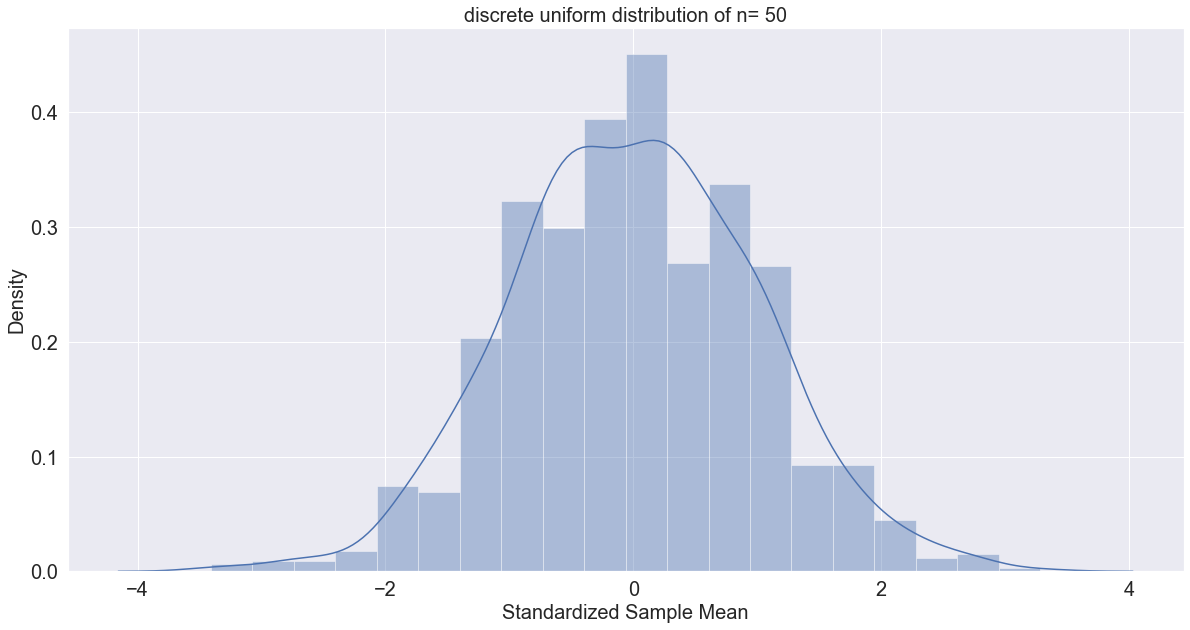

In [9]:
# question 2)

# sample size n is equal to a list
n= [2, 10, 20, 30, 50]

# We create a X variable with n observations in each loop
# We calculate the sample mean for this X variable as x_bar_n in each loop
# Loop for 1000 times, we save x_bar_n to x_bars_n during each loop
# After that, we plot the distribution of x_bars_n

for i in n:
    samples=1000

    x_bars_n=np.zeros(samples)

    for x in range(samples):
        sample_n=np.random.randint(4,8,i)
        x_bar_n=sample_n.mean()
        x_bars_n[x]= (x_bar_n-my)/(sigma/np.sqrt(i))
    
    x_bars_n

    plt.figure(figsize=(20,10))
    sns.distplot(x_bars_n, bins=20)
    plt.title(f'discrete uniform distribution of n= {i}', fontsize=20)
    plt.xlabel('Standardized Sample Mean', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

5) Vad händer med fördelningen för de standardiserade stickprovsmedelvärdena då antalet observationer som stickprovsmedelvärdena baseras på ökar? Finns det något teoretiskt stöd för detta och i så fall vilket? 

From the previous figures, we found that the distribution of the standarized sample mean trends to be normal distribution(informally a " bell curve " with mean equal to 0) as n becomes larger, especially in the case n=50. The underlying theorem is Central Limit Theorem. As n>= 30, the distribution of the standarized sample mean becomes normal distribution even if the original variable is not normal distribution.

6)  Gör 1000 95%-konfidensintervall för populationsmedelvärdet μ, vart och ett baserat på 50 observationer av slumpvariabler. Hur många av dessa täcker populationsmedelvärdet? Är detta vad du förväntade dig? Motivera? 

**TODO:** Konfidensintervall för medelvärde i en population (känd standardavvikelse):

$${\bar x} + - z(alpha/2)*sigma/sqrt(n)$$

In [56]:
samples=1000
n=50
count = 0

for x in range(samples):
    sample_n=np.random.randint(4,8,n)
    x_bar_n=sample_n.mean()
    #create 95% confidence interval for population mean
    # scs.norm.ppf(.975).round(2) is 1.96
    z_critical_value = scs.norm.ppf(1-.05/2).round(2)
    up_limit = x_bar_n + z_critical_value*sigma/np.sqrt(n)
    down_limit = x_bar_n - z_critical_value*sigma/np.sqrt(n)
    if down_limit < my < up_limit:
        count += 1 
print(f'For {count} of 1000 times, the confidence interval includes the population mean, which is a proportion of {count/samples*100:.2f}%')

For 959 of 1000 times, the confidence interval includes the population mean, which is a proportion of 95.90%


**TODO:** Please add the explanation to this.

Around 95.90% of times does the population mean locates in the confidence interval. 
This is what I expected according to Central Limit Theorem. As n=50 >= 30, so the sample mean can be thought as a normal distributed random variable with mean as populaltion mean and standard deviation as population standard deviation sigma/sqrt(n)

7) Antag att vi vill göra hypotestest för populationsmedelvärdet med

H_0:μ≤5.1
H_A:μ>5.1

Testet ska utföras på signifikansnivån 0.05 och med stickprovsstorleken 50. Med hjälp av de 1000 raderna och 50 kolonnerna med observerade slumpvariabler vill vi undersöka testets styrka genom att utföra testet 1000 gånger. Vad blir styrkan, dvs hur stor andel av testerna förkastar den falska nollhypotesen? 


## Uppgifter 2

In [ ]:
#Define an array for 1000 samples per each sample size
samples=1000
samples_5 = np.zeros((samples,5)) 
#Defining parameters from our population distribution
lo, hi = 7,11
#Creating for loop for sample size 5
for x in range(samples):
    samples_5[x,] = np.random.uniform(lo, hi, 5)